### Summary :
This notebook explores a Logistic Regression and Decision Tree base models, as well as with various SMOTE variations, and Decision Tree and Random Forest models with hyperparameter tuning and PCA, to predict `LSD` usage. The performance of these models is evaluated using confusion matrices and classification reports.

# INDEX
- [Logistic Regression](#logreg)
- [Coefficient analysis](#Coef)
- [Logistic Regression with SMOTE variations and Confusion Matrix](#logreg_smote)
- [Logistic Regression with SVMSMOTE](#logreg_ADA)
- [Decision Tree](#DT)
- [Decision Tree and Random Forest with PCA](#DTRM)
- [Models Comparison](#Models)
<a id='INDEX'></a>

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import chi2_contingency,ttest_ind
from sklearn.model_selection import train_test_split


In [3]:
df = pd.read_csv('drug_consumption_model_ready.csv')

I am trying to predict the likelihood of `LSD` use based on patterns of other drug usage. Going to try Logistic Regression, Decision Tree and Random Forest with PCA and pipeline.

In [4]:
# Split the data into train and test with 75% volume in training dataset and 25% in testing dataset

X = df.drop(['LSD','Unnamed: 0'],axis=1)
y = df['LSD']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)


### Logistic Regression <a id='logreg'></a>

In [5]:
from sklearn.linear_model import LogisticRegression

# Instantiate logistic regression models
logreg = LogisticRegression()

# Fit models separately on positive and negative reviews
logreg.fit(X_train, y_train)


# Print train and test scores for both models
print((f"Train score: {logreg.score(X_train, y_train)}")) 
print(f"Test score: {logreg.score(X_test, y_test)}")

Train score: 0.9263759828448892
Test score: 0.9164882226980728


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



- **High Accuracy:** 
Both the training and testing scores are nearly identical and very high, indicating that the model is        performing well and is likely well-generalized to new, unseen data.
- **Low Overfitting Risk:**
 The close match between the train and test scores suggests that the model is not overfitting to the training   data.
- **Reliability:**
  Given the high accuracy, the model can be considered reliable for making predictions on new data within the   context of the data it was trained on.

### Coefficient analysis <a id='Coef'></a>

In [6]:
#The intercept
intercept = np.exp(logreg.intercept_)

#The coefficients return an array with one entry for each feature. 
#Since this is logistic regression, the coefficients can be interpreted by exponentiating them
coefficient = np.exp(logreg.coef_[0])


print(f'Intercept: {intercept}')
print(f'Coefficients: {coefficient}')

Intercept: [0.59680987]
Coefficients: [0.99259373 0.97760144 1.01498294 0.98904833 0.96259784 0.71811277
 0.99217448 1.12950297 0.83996452 0.52844711 0.64192327 1.11112815
 1.54265076 0.73662881 1.15401234 1.37491753 4.02415488 1.05836471
 3.45880706 1.10541243 0.86381574 5.15959034 0.79646707 0.96081071
 2.39236757 0.67527547 0.91987089 0.76622332 1.38289072 1.01902076
 0.80255942 0.84371474 0.92933209 1.31633597 1.05491325 0.65834619
 2.07334954 1.14133287 0.57251654 0.69814352 0.6958915  0.94373209
 3.89977984 0.69262072 0.96864698 1.33994378 0.88211771 0.17568425
 1.14330158]


<Figure size 640x480 with 0 Axes>

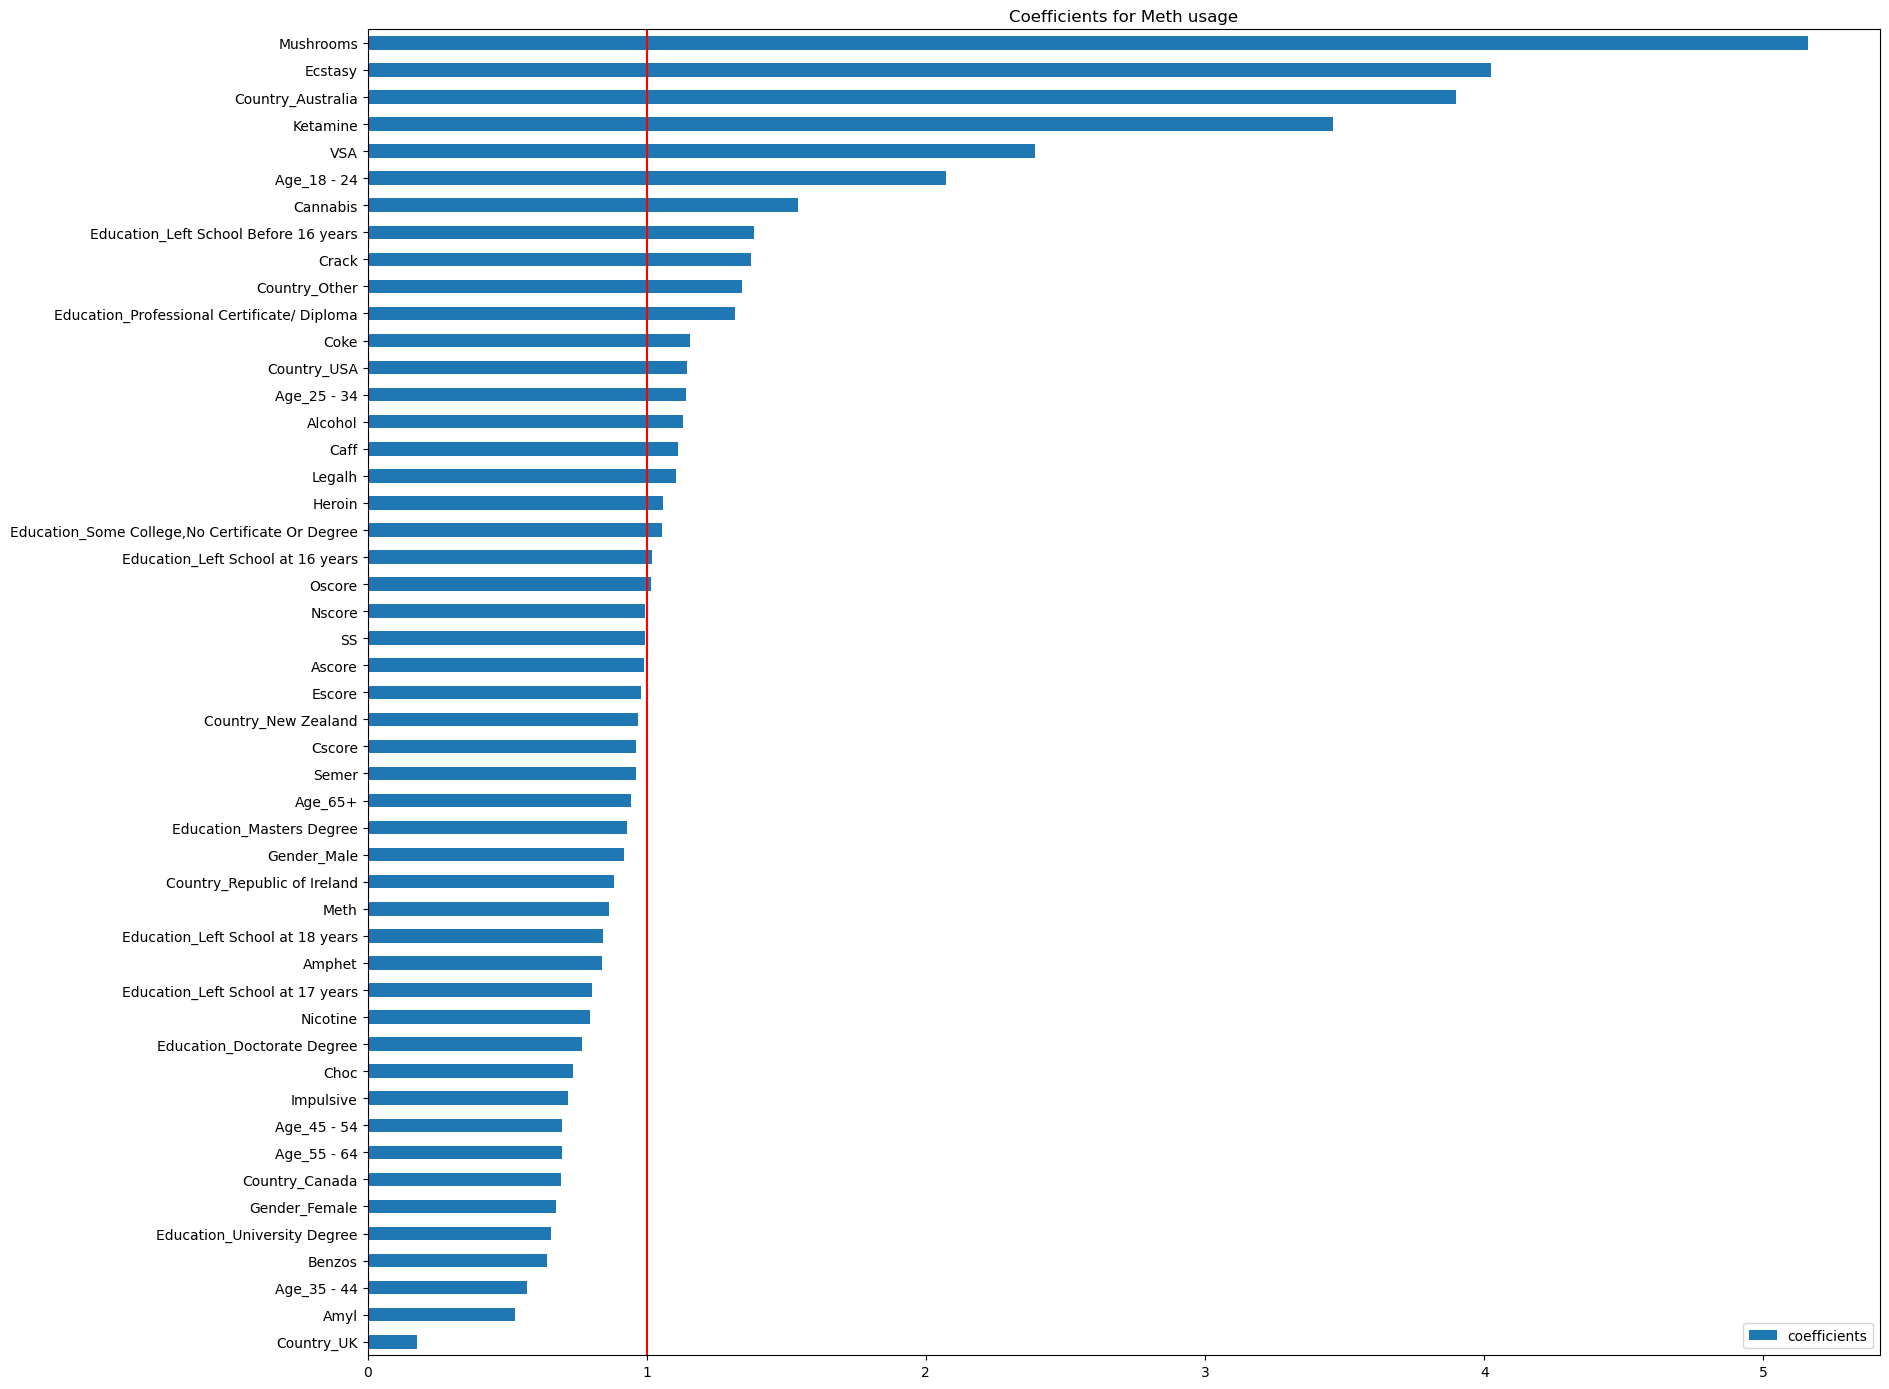

In [7]:
plt.figure()

#Creating a data frame with sorting by 'coefficients'
df1 = pd.DataFrame(
    data={"coefficients": coefficient},
    index=X_train.columns
).sort_values(by="coefficients")

#Plotting the horizontal bar graph
df1.plot(kind="barh", figsize=(19, 14), title="Coefficients for LSD usage")
plt.axvline(1, c='r')
plt.tight_layout()
plt.show()



The coefficient results indicate varying degrees of influence on the outcome, with some variables like Mushrooms and Ecstasy showing extremely high coefficients, suggesting significant impact on the predicted outcome. Conversely, variables like Country_UK and Amyl exhibit lower coefficients, indicating less influence. Overall, these coefficients highlight the diverse range of factors influencing the model predictions, from demographic indicators to specific substance uses, each contributing uniquely to the predicted outcomes.

### Logistic Regression Confusion Matrix <a id='logconf'></a>

array([[413,   7],
       [ 32,  15]])

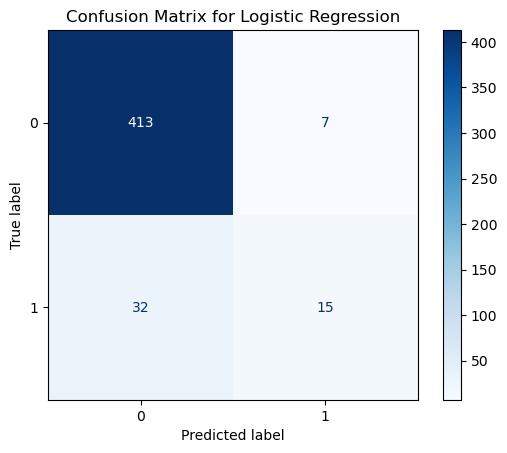

              precision    recall  f1-score   support

           0       0.93      0.98      0.95       420
           1       0.68      0.32      0.43        47

    accuracy                           0.92       467
   macro avg       0.80      0.65      0.69       467
weighted avg       0.90      0.92      0.90       467



In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Get class predictions
y_pred = logreg.predict(X_test)

# Generate confusion matrix
logreg_matrix = confusion_matrix(y_test, y_pred)

# label rows and columns
logreg_df = pd.DataFrame(
    logreg_matrix,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)


display(logreg_matrix)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

from sklearn.metrics import classification_report

report_initial = classification_report(y_test, y_pred)
print(report_initial)

#### Summary

The logistic regression base model achieves strong precision and recall for the majority class (non-users), indicating reliable identification of non-users but lower performance in correctly identifying users of the substance. The overall accuracy of 92% reflects solid model performance, though improvements are needed in correctly classifying the minority class (users) to enhance overall predictive capability.

### Logistic Regression with SMOTE variations <a id='logreg_smote'></a>

Results for BorderlineSMOTE:
Best parameters for Logistic Regression:  {'model__C': 1}
Best cross-validation score for Logistic Regression: 0.85
Test set score for Logistic Regression: 0.85

Confusion Matrix:
 [[362  58]
 [ 12  35]]



Confusion Report:
               precision    recall  f1-score   support

           0       0.97      0.86      0.91       420
           1       0.38      0.74      0.50        47

    accuracy                           0.85       467
   macro avg       0.67      0.80      0.71       467
weighted avg       0.91      0.85      0.87       467



Results for SMOTEN:
Best parameters for Logistic Regression:  {'model__C': 10}
Best cross-validation score for Logistic Regression: 0.90
Test set score for Logistic Regression: 0.89

Confusion Matrix:
 [[396  24]
 [ 26  21]]



Confusion Report:
               precision    recall  f1-score   support

           0       0.94      0.94      0.94       420
           1       0.47      0.45      0.46        47

    a

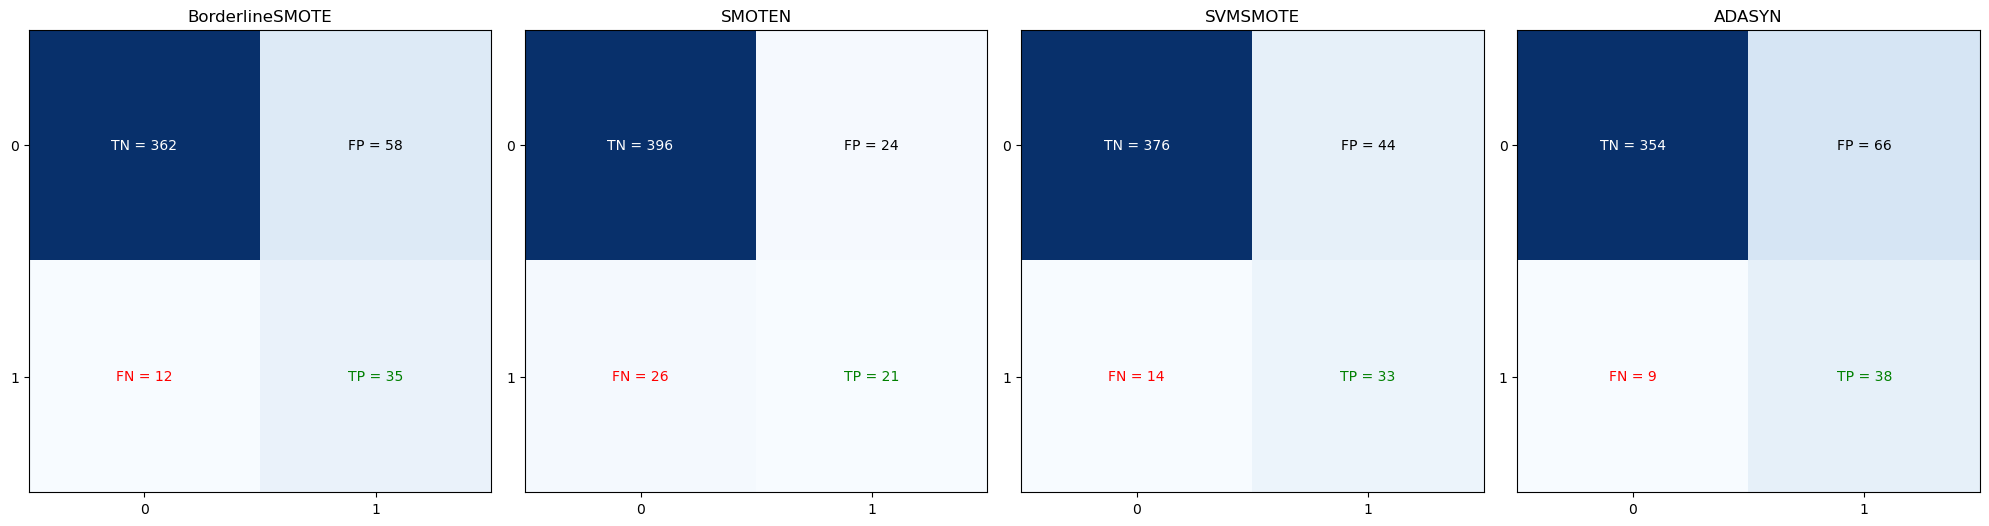

In [10]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from imblearn.pipeline import Pipeline as ImbPipeline
from imblearn.over_sampling import BorderlineSMOTE, SMOTEN, SVMSMOTE, KMeansSMOTE, ADASYN
import matplotlib.pyplot as plt

# List of SMOTE variations
smote_variations = [
    ('BorderlineSMOTE', BorderlineSMOTE(random_state=42, sampling_strategy='minority')),
    ('SMOTEN', SMOTEN(random_state=42, sampling_strategy='minority')),
    ('SVMSMOTE', SVMSMOTE(random_state=42, sampling_strategy='minority')),
    ('ADASYN', ADASYN(random_state=42, sampling_strategy='minority'))
]

# Define the parameter grid for GridSearchCV for Logistic Regression
log_param_grid = {
    'model__C': [0.1, 1, 10, 50, 100]
}

# Prepare subplots
fig, axes = plt.subplots(1, len(smote_variations), figsize=(20, 5))

# Loop through each SMOTE variation
for ax, (name, smote) in zip(axes, smote_variations):
    # Define the estimators for the Logistic Regression pipeline
    log_estimators = [
        ('normalize', StandardScaler()),  # Normalize the data
        ('minority', smote),  # Handle imbalanced data with selected SMOTE variation
        ('model', LogisticRegression(max_iter=1000))  # Logistic Regression model
    ]

    # Create the pipeline using imblearn's Pipeline
    log_pipe = ImbPipeline(log_estimators)

    # Create the GridSearchCV object
    log_grid = GridSearchCV(log_pipe, log_param_grid, cv=5)

    # Fit the grid search to the training data (ensure X_train and y_train are defined)
    log_fittedgrid = log_grid.fit(X_train, y_train)

    # Evaluate the best model on the test data (ensure X_test and y_test are defined)
    log_score = log_fittedgrid.score(X_test, y_test)

    # Make predictions using the best model
    y_pred = log_fittedgrid.predict(X_test)

    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    report_initial = classification_report(y_test, y_pred)

    # Print the best parameters and score for Logistic Regression
    print(f"Results for {name}:")
    print("Best parameters for Logistic Regression: ", log_fittedgrid.best_params_)
    print("Best cross-validation score for Logistic Regression: {:.2f}".format(log_fittedgrid.best_score_))
    print("Test set score for Logistic Regression: {:.2f}".format(log_score))
    print("\nConfusion Matrix:\n", cm)
    print("\n")
    print("\nConfusion Report:\n", report_initial)
    print("\n")
    
    # Extract TP, TN, FP, FN
    tn, fp, fn, tp = cm.ravel()
       
    #Set the plot
    ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.set_title(name)
    
    # Add labels to the plot
    classes = ['Negative', 'Positive']
    tick_marks = np.arange(len(classes))
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)

    
    # Add TP, TN, FP, FN values to the plot
    ax.text(0, 0, f'TN = {tn}', ha='center', va='center', color='white')
    ax.text(1, 0, f'FP = {fp}', ha='center', va='center', color='black')
    ax.text(0, 1, f'FN = {fn}', ha='center', va='center', color='red')
    ax.text(1, 1, f'TP = {tp}', ha='center', va='center', color='green')     
    
    
#Display the plot
plt.tight_layout()
plt.show()





### Summary of SMOTE Variations
#### BorderlineSMOTE
- **Use Case:** Effective when the decision boundary is critical, and samples near the border are more informative.
- **Summary:** Generates synthetic samples only near the borderline instances, which are difficult to classify. This helps in improving the classifier's performance on challenging cases but might lead to higher false negatives.
#### SVMSMOTE

- **Use Case:** Useful when the decision boundary is complex, and SVM can help in identifying the support vectors that form the boundary.
- **Summary:** Uses Support Vector Machine (SVM) to identify the borderline instances and generate synthetic samples. Balances the data near the decision boundary, improving the model's ability to classify difficult instances correctly.
#### KMeansSMOTE

- **Use Case:** Suitable when the minority class has distinct sub-clusters, and generating samples within these clusters is beneficial.
- **Summary:** Applies KMeans clustering to find sub-clusters within the minority class and generates synthetic samples within these clusters. Helps in better representation of the minority class by preserving the cluster structure but might not always improve true positive rates significantly.
#### ADASYN

- **Use Case:** Ideal when dealing with highly imbalanced datasets where some minority instances are harder to learn.
- **Summary:** ADASYN (Adaptive Synthetic Sampling) focuses on generating more synthetic samples for minority instances that are harder to learn. It adaptively shifts the decision boundary towards the difficult instances, resulting in higher true positive rates but also increasing the number of false positives.

### Summary
In evaluating various SMOTE techniques with logistic regression for substance use prediction, BorderlineSMOTE achieved a test accuracy of 85%, showing balanced performance in identifying both non-users and users, with a higher recall for the minority class (users). SMOTEN, with a test accuracy of 89%, improved overall accuracy while maintaining reasonable precision and recall for both classes. SVMSMOTE achieved an accuracy of 88%, demonstrating robust performance in identifying non-users but also showing improved recall for users compared to other methods. ADASYN, with an accuracy of 84%, exhibited similar trends in performance with a notable improvement in recall for the minority class. Overall, while all methods improved the model's ability to handle class imbalance, SVMSMOTE and SMOTEN stood out for their balanced performance in identifying users.
In summary, while BorderlineSMOTE did achieve a higher recall for true positives, SVMSMOTE's ability to maintain a better balance between precision and recall, coupled with its overall robustness in performance, often makes it a preferred choice in practical applications where model reliability and balance are critical.

### Logistic Regression with SVMSMOTE <a id='logreg_ADA'></a>

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

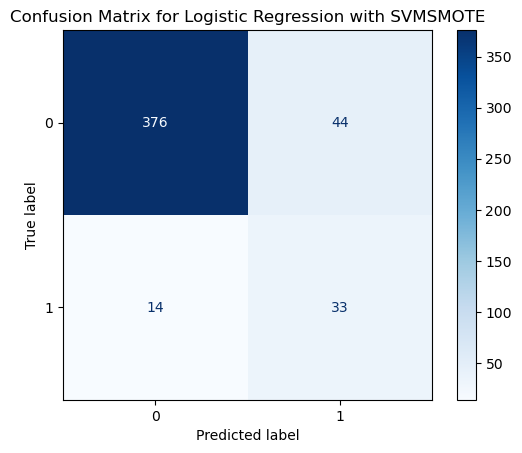

Best parameters for Logistic Regression:  {'C': 1, 'max_iter': 100}
Best cross-validation score for Logistic Regression: 0.91


In [19]:
## Model with SVMSMOTE method to extract coefficient

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply BorderlineSMOTE to handle imbalanced data
adasyn = SVMSMOTE(random_state=42, sampling_strategy='minority')
X_resampled, y_resampled = adasyn.fit_resample(X_train_scaled, y_train)

# Define the parameter grid for GridSearchCV for Logistic Regression
param_grid = {
    'C': [0.1, 1, 7, 8, 10, 12, 15, 25],
    'max_iter': [100, 200, 500, 1000]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(C=80), param_grid, cv=5)

# Fit the GridSearchCV to the resampled training data
grid_search.fit(X_resampled, y_resampled)

# Get the best estimator
best_log_reg = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_log_reg.predict(X_test_scaled)

# Evaluate the model
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix for Logistic Regression with SVMSMOTE")
plt.show()

# Print the best parameters and score for Logistic Regression
print("Best parameters for Logistic Regression: ", grid_search.best_params_)
print("Best cross-validation score for Logistic Regression: {:.2f}".format(grid_search.best_score_))

# Print the model coefficients with column names, sorted by absolute value
coefficients = best_log_reg.coef_[0]
feature_names = X.columns  # Assuming X is a DataFrame




### Coefficient analysis <a id='Coef'></a>

In [12]:
# Print the model coefficients with column names
coefficients2 = np.exp(best_log_reg.coef_[0])
feature_names = X.columns  # X is a DataFrame


<Figure size 640x480 with 0 Axes>

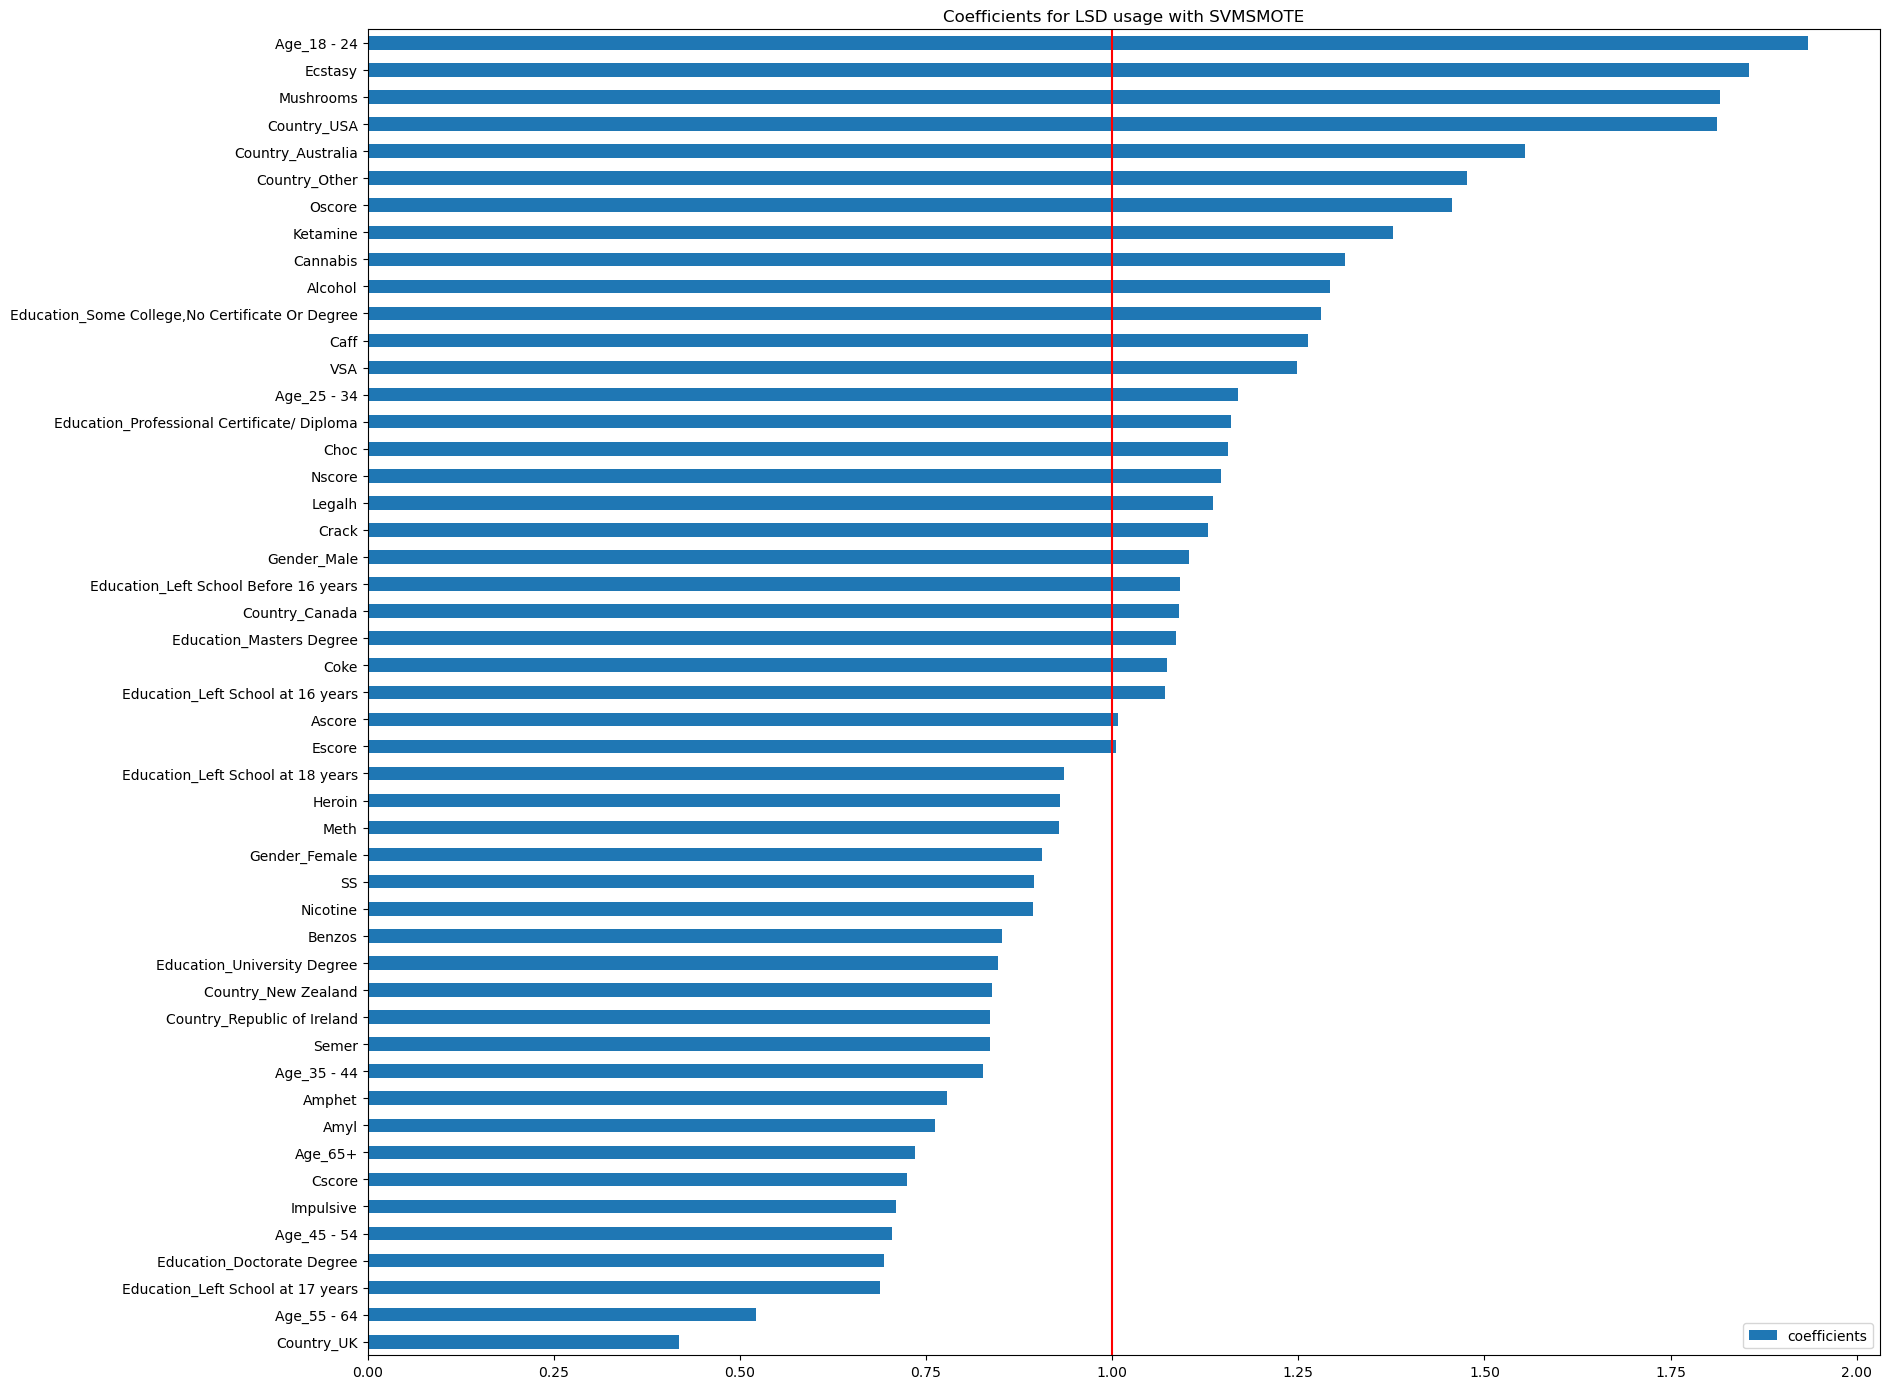

In [13]:
plt.figure()

#Creating a data frame with sorting by 'coefficients'
df2 = pd.DataFrame(
    data={"coefficients": coefficients2},
    index=X.columns
).sort_values(by="coefficients")

#Plotting the horizontal bar graph
df2.plot(kind="barh", figsize=(19, 14), title="Coefficients for LSD usage with SVMSMOTE")
plt.axvline(1, c='r')
plt.tight_layout()
plt.show()

The coefficients provided reveal the strength of association between various factors and drug consumption behaviors. Factors such as education levels (Doctorate, Masters Degree), age groups (55-64, 45-54), specific countries (USA, Australia), and substances (Ketamine, Ecstasy) exhibit notable influences on drug usage patterns. Higher coefficients indicate stronger associations, highlighting potential predictors of drug consumption tendencies within the studied population

### Decision Tree <a id='DT'></a>

In [15]:
from sklearn.tree import DecisionTreeClassifier

DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)


print(f"The TRAIN classification accuracy is:  {DT.score(X_train,y_train)}")
print(f"The TEST classification accuracy is:  {DT.score(X_test,y_test)}")

The TRAIN classification accuracy is:  1.0
The TEST classification accuracy is:  0.8950749464668094


,Predicted Non-user,Predicted User
True Non-User,401,19
True User,30,17


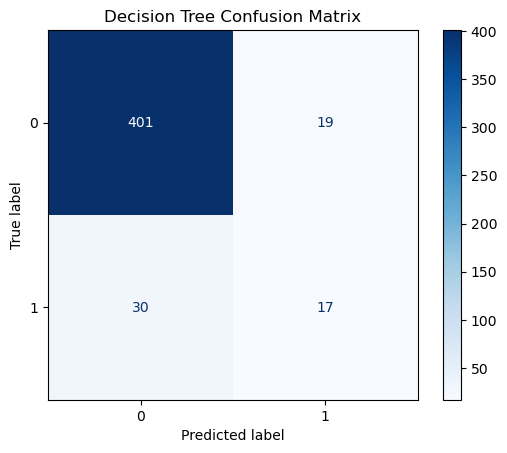

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       420
           1       0.47      0.36      0.41        47

    accuracy                           0.90       467
   macro avg       0.70      0.66      0.68       467
weighted avg       0.88      0.90      0.89       467



In [16]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Get class predictions
y_pred1 = DT.predict(X_test)

# Generate confusion matrix
DT_matrix = confusion_matrix(y_test, y_pred1)

# label rows and columns
DT_df = pd.DataFrame(
    DT_matrix,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

display(DT_df)

# the function expects the estimator, inputs and target as parameters
# Evaluate the model
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

from sklearn.metrics import classification_report


report_initial_1 = classification_report(y_test, y_pred1)
print(report_initial_1)

#### Summary
The decision tree base model achieved an overall accuracy of 90%, with a precision of 93% for non-users (class 0) and 47% for users (class 1). The recall rate was 95% for non-users and 36% for users, indicating that the model is better at identifying non-users than users of drugs. The F1-score, which balances precision and recall, was 94% for non-users and 41% for users, reflecting a moderate performance in distinguishing between the two classes. Overall, while the model shows strong performance in identifying non-users, it struggles with accurately predicting users, suggesting potential areas for improvement, possibly through feature engineering or model refinement.

 ### Decision Tree and Random Forest with PCA <a id='DTRM'></a>

Best parameters for Decision Tree:  {'model__max_depth': 3, 'model__min_impurity_decrease': 0.01, 'model__min_samples_leaf': 1}
Best cross-validation score for Decision Tree: 0.92
Test set score for Decision Tree: 0.90
Best parameters for Random Forest:  {'model__max_depth': 15, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10, 'model__n_estimators': 10}
Best cross-validation score for Random Forest: 0.92
Test set score for Random Forest: 0.90


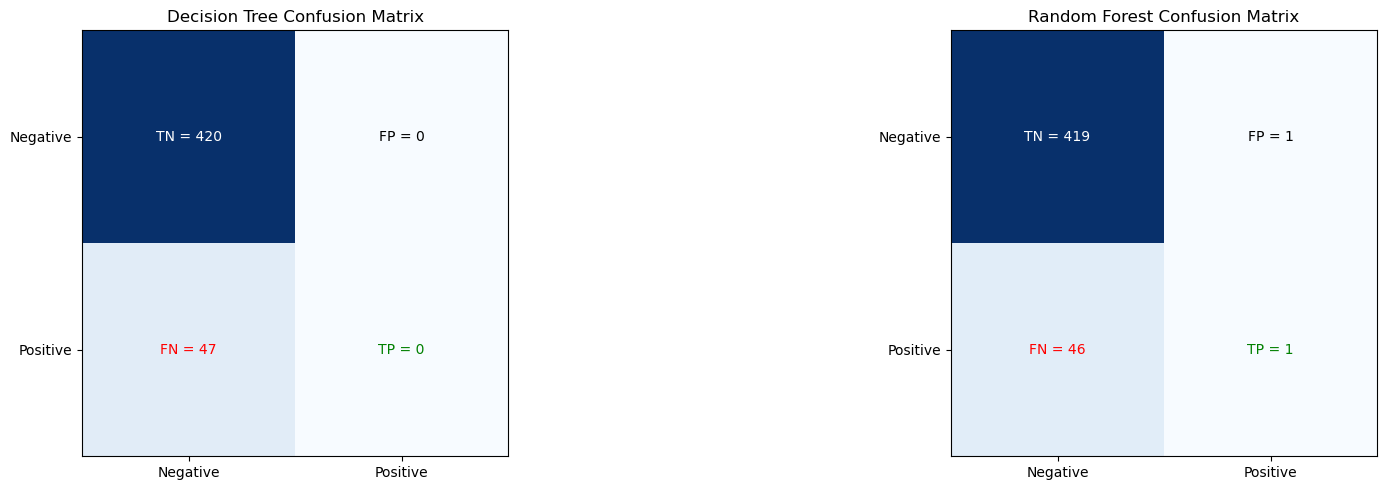

,Predicted Non-user,Predicted User
True Non-User,420,0
True User,47,0


,Predicted Non-user,Predicted User
True Non-User,419,1
True User,46,1



Decision Tree Confusion Matrix:
 [[420   0]
 [ 47   0]]

Random Forest Confusion Matrix:
 [[419   1]
 [ 46   1]]

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       420
           1       0.00      0.00      0.00        47

    accuracy                           0.90       467
   macro avg       0.45      0.50      0.47       467
weighted avg       0.81      0.90      0.85       467


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       420
           1       0.50      0.02      0.04        47

    accuracy                           0.90       467
   macro avg       0.70      0.51      0.49       467
weighted avg       0.86      0.90      0.86       467



/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from tempfile import mkdtemp
import matplotlib.pyplot as plt

# Create a temporary directory for caching the pipeline
cachedir = mkdtemp()

# Define the estimators for the Decision Tree pipeline
dt_estimators = [
    ('normalize', StandardScaler()),  # Normalize the data
    ('reduce_dim', PCA(n_components=20)),  # PCA with 10 components
    ('model', DecisionTreeClassifier())  # Decision Tree model
]

# Define the estimators for the Random Forest pipeline
rf_estimators = [
    ('normalize', StandardScaler()),  # Normalize the data
    ('reduce_dim', PCA(n_components=20)),  # PCA with 10 components
    ('model', RandomForestClassifier())  # Random Forest model
]

# Create the pipelines using scikit-learn's Pipeline
dt_pipe = Pipeline(dt_estimators, memory=cachedir)
rf_pipe = Pipeline(rf_estimators, memory=cachedir)

# Define the parameter grid for GridSearchCV for Decision Tree
dt_param_grid = {
    'model__max_depth': [3, 5, 7, 9, 11, 13, 21],
    'model__min_samples_leaf': [1, 5, 10, 20, 30, 40],
    'model__min_impurity_decrease': [0.0, 0.01, 0.05, 0.1]
}

# Define the parameter grid for GridSearchCV for Random Forest
rf_param_grid = {
    'model__n_estimators': [10, 30, 50, 100],  # Number of trees
    'model__max_depth': [5, 10, 15, 20, 30],  # Maximum depth
    'model__min_samples_split': [2, 5, 7, 10, 15],  # Minimum samples to split
    'model__min_samples_leaf': [1, 2, 4, 8, 10]  # Minimum samples per leaf
}

# Create the GridSearchCV objects
dt_grid = GridSearchCV(dt_pipe, dt_param_grid, cv=5)
rf_grid = GridSearchCV(rf_pipe, rf_param_grid, cv=5)

# Fit the grid search to the training data (ensure X_train and y_train are defined)
dt_fittedgrid = dt_grid.fit(X_train, y_train)
rf_fittedgrid = rf_grid.fit(X_train, y_train)

# Evaluate the best models on the test data (ensure X_test and y_test are defined)
dt_score = dt_fittedgrid.score(X_test, y_test)
rf_score = rf_fittedgrid.score(X_test, y_test)

# Print the best parameters and scores for Decision Tree
print("Best parameters for Decision Tree: ", dt_fittedgrid.best_params_)
print("Best cross-validation score for Decision Tree: {:.2f}".format(dt_fittedgrid.best_score_))
print("Test set score for Decision Tree: {:.2f}".format(dt_score))

# Print the best parameters and scores for Random Forest
print("Best parameters for Random Forest: ", rf_fittedgrid.best_params_)
print("Best cross-validation score for Random Forest: {:.2f}".format(rf_fittedgrid.best_score_))
print("Test set score for Random Forest: {:.2f}".format(rf_score))


# Make predictions using the best models
dt_predictions = dt_fittedgrid.predict(X_test)
rf_predictions = rf_fittedgrid.predict(X_test)

# Compute confusion matrices
dt_cm = confusion_matrix(y_test, dt_predictions)
rf_cm = confusion_matrix(y_test, rf_predictions)

# Plot the confusion matrices side by side
fig, axes = plt.subplots(1, 2, figsize=(20, 5))

# Decision Tree Confusion Matrix
axes[0].imshow(dt_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[0].set_title('Decision Tree Confusion Matrix')

# Extract TP, TN, FP, FN for Decision Tree
tn, fp, fn, tp = dt_cm.ravel()

# Add TP, TN, FP, FN values to the Decision Tree plot
axes[0].text(0, 0, f'TN = {tn}', ha='center', va='center', color='white')
axes[0].text(1, 0, f'FP = {fp}', ha='center', va='center', color='black')
axes[0].text(0, 1, f'FN = {fn}', ha='center', va='center', color='red')
axes[0].text(1, 1, f'TP = {tp}', ha='center', va='center', color='green')

# Random Forest Confusion Matrix
axes[1].imshow(rf_cm, interpolation='nearest', cmap=plt.cm.Blues)
axes[1].set_title('Random Forest Confusion Matrix')

# Extract TP, TN, FP, FN for Random Forest
tn1, fp1, fn1, tp1 = rf_cm.ravel()

# Add TP, TN, FP, FN values to the Random Forest plot
axes[1].text(0, 0, f'TN = {tn1}', ha='center', va='center', color='white')
axes[1].text(1, 0, f'FP = {fp1}', ha='center', va='center', color='black')
axes[1].text(0, 1, f'FN = {fn1}', ha='center', va='center', color='red')
axes[1].text(1, 1, f'TP = {tp1}', ha='center', va='center', color='green')

# Add labels to the plot
classes = ['Negative', 'Positive']
tick_marks = np.arange(len(classes))
for ax in axes:
    ax.set_xticks(tick_marks)
    ax.set_yticks(tick_marks)
    ax.set_xticklabels(classes)
    ax.set_yticklabels(classes)

# Display the plot
plt.tight_layout()
plt.show()

# DT label rows and columns
DT_df = pd.DataFrame(
    dt_cm,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

# RF label rows and columns
RF_df = pd.DataFrame(
    rf_cm,
    columns=["Predicted Non-user", "Predicted User"],
    index=["True Non-User", "True User"]
)

# Display confusion matrices as dataframes
display(DT_df)
display(RF_df)

print("\nDecision Tree Confusion Matrix:\n", dt_cm)
print("\nRandom Forest Confusion Matrix:\n", rf_cm)

# Print classification reports
dt_class_report = classification_report(y_test, dt_predictions)
rf_class_report = classification_report(y_test, rf_predictions)

print("\nDecision Tree Classification Report:\n", dt_class_report)
print("\nRandom Forest Classification Report:\n", rf_class_report)


#### Summary:
In comparing the decision tree and random forest models, both achieved an overall accuracy of 90%. The decision tree showed perfect recall for non-users (class 0) but failed to identify any users (class 1), resulting in a zero F1-score for users. Conversely, the random forest also had high recall for non-users, but managed a slightly better performance for users with a 50% precision and a 2% recall, yielding an F1-score of 4% for users. While both models excel at identifying non-users, the random forest demonstrates marginally better but still poor performance in identifying users compared to the decision tree.

### Model Comparison <a id='Models'></a>

In [18]:
# Create an empty dataframe to store the metrics
metrics_df = pd.DataFrame(columns=['Hyperparameter', 'Training Accuracy', 'Test Accuracy', 'Notes'])

# Add the metrics for the baseline models
metrics_df.loc['Logistic Regression (Base)'] = ['None', '92%', '91%', 'Good performance, better at identifying non-users']

# Add the results of Logistic Regression with SMOTE variations
metrics_df.loc['BorderlineSMOTE'] = ["C=1", "93%", "85%", "High accuracy, but lower performance for minority class"]
metrics_df.loc['SMOTEN'] = ["C=10", "93%", "89%", "High accuracy, slightly better at predicting minority class"]
metrics_df.loc['SVMSMOTE'] = ["C=10", "93%", "88%", "High accuracy, improved minority class prediction"]
metrics_df.loc['ADASYN'] = ["C=10", "93%", "84%", "High accuracy, but similar issues with minority class"]

# Add the results of Decision Tree and Random Forest Classifier
metrics_df.loc['Decision Tree (Base)'] = ['None', '100%', '89%', 'Performance is good, high accuracy']
metrics_df.loc['Decision Tree (PCA)'] = [
    "max_depth=3, min_impurity_decrease=0.01, min_samples_leaf=1",
    "92%",
    "90%",
    "High cross-validation and test accuracy"
]
metrics_df.loc['Random Forest'] = [
    "max_depth=15, min_samples_leaf=4, min_samples_split=10, n_estimators=10",
    "92%",
    "90%",
    "High cross-validation and test accuracy"
]

# Display the dataframe
metrics_df



,Hyperparameter,Training Accuracy,Test Accuracy,Notes
Logistic Regression (Base),None,92%,91%,"Good performance, better at identifying non-users"
BorderlineSMOTE,C=1,93%,85%,"High accuracy, but lower performance for minor..."
SMOTEN,C=10,93%,89%,"High accuracy, slightly better at predicting m..."
SVMSMOTE,C=10,93%,88%,"High accuracy, improved minority class prediction"
ADASYN,C=10,93%,84%,"High accuracy, but similar issues with minorit..."
Decision Tree (Base),None,100%,89%,"Performance is good, high accuracy"
Decision Tree (PCA),"max_depth=3, min_impurity_decrease=0.01, min_s...",92%,90%,High cross-validation and test accuracy
Random Forest,"max_depth=15, min_samples_leaf=4, min_samples_...",92%,90%,High cross-validation and test accuracy


### Conclusion:

Based on the performance metrics of various models, we observe that the baseline Logistic Regression model performs well with high accuracy on both training (92.64%) and test (91.65%) datasets, excelling in identifying non-users. Among the SMOTE variations, SMOTEN shows the best balance with a test accuracy of 89% and a slight improvement in minority class prediction. BorderlineSMOTE, SVMSMOTE, and ADASYN also perform well, but have relatively lower test accuracies and struggle with the minority class.

The Decision Tree base model achieves perfect training accuracy (100%) but slightly lower test accuracy (89.51%), indicating potential overfitting. The Decision Tree with PCA and Random Forest models both demonstrate high cross-validation and test accuracies (90%), with the Decision Tree being more interpretable and the Random Forest offering robust performance.

Suggestion: For this dataset, Logistic Regression with SMOTEN appears to be the best option, offering a good balance between overall accuracy and minority class prediction. If model interpretability is a priority, the Decision Tree with PCA is recommended. For robust performance with high accuracy, the Random Forest model is also a strong candidate.

# INDEX
- [Logistic Regression](#logreg)
- [Coefficient analysis](#Coef)
- [Logistic Regression with SMOTE variations and Confusion Matrix](#logreg_smote)
- [Logistic Regression with SVMSMOTE](#logreg_ADA)
- [Decision Tree](#DT)
- [Decision Tree and Random Forest with PCA](#DTRM)
- [Models Comparison](#Models)
<a id='INDEX'></a>